In this exploration notebook, we shall try to uncover the basic information about the dataset which will help us build our models / features.

Let us start with importing the necessary modules.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing
# import xgboost as xgb
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
# pd.set_option('display.max_columns', 500)

First let us import the train file and get some idea about the data.

In [2]:
train_df = pd.read_csv("../input/train.csv")
train_df.shape

(30471, 292)

In [19]:
pd.options.display.max_columns = 30
train_df.head()


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,...,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,...,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,...,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,...,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,178473,...,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,108171,...,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452


In [20]:
pd.options.display.max_seq_items = 30
train_df.columns

Index([u'id', u'timestamp', u'full_sq', u'life_sq', u'floor', u'max_floor',
       u'material', u'build_year', u'num_room', u'kitch_sq',
       ...
       u'cafe_count_5000_price_2500', u'cafe_count_5000_price_4000',
       u'cafe_count_5000_price_high', u'big_church_count_5000',
       u'church_count_5000', u'mosque_count_5000', u'leisure_count_5000',
       u'sport_count_5000', u'market_count_5000', u'price_doc'],
      dtype='object', length=292)

In [79]:
# corr_val[]
# corr_val[]
np.abs(corr_val) > 0.25

id                                       False
full_sq                                   True
life_sq                                  False
floor                                    False
max_floor                                False
material                                 False
build_year                               False
num_room                                  True
kitch_sq                                 False
state                                    False
area_m                                   False
raion_popul                              False
green_zone_part                          False
indust_part                              False
children_preschool                       False
preschool_quota                          False
preschool_education_centers_raion        False
children_school                          False
school_quota                             False
school_education_centers_raion           False
school_education_centers_top_20_raion    False
hospital_beds

In [81]:
corr_val = train_df.corr()['price_doc']
ordered_indecis = np.abs(corr_val).sort_values(ascending =False).index
# corr_val[ordered_indecis]
corr_val

id                                       0.121203
full_sq                                  0.341840
life_sq                                  0.165606
floor                                    0.117447
max_floor                                0.094386
material                                 0.064047
build_year                               0.002161
num_room                                 0.476337
kitch_sq                                 0.028718
state                                    0.121303
area_m                                  -0.166981
raion_popul                              0.151587
green_zone_part                         -0.094486
indust_part                             -0.082614
children_preschool                       0.133957
preschool_quota                         -0.075118
preschool_education_centers_raion        0.159418
children_school                          0.138860
school_quota                            -0.014012
school_education_centers_raion           0.193636


In [111]:
high_corr_col = corr_val[np.abs(corr_val) >0.28].index
high_corr_col

Index([u'full_sq', u'num_room', u'sadovoe_km', u'zd_vokzaly_avto_km',
       u'sport_count_3000', u'trc_count_5000', u'sport_count_5000',
       u'price_doc'],
      dtype='object')

In [119]:
list(high_corr_col)+['material']

['full_sq',
 'num_room',
 'sadovoe_km',
 'zd_vokzaly_avto_km',
 'sport_count_3000',
 'trc_count_5000',
 'sport_count_5000',
 'price_doc',
 'material']

In [121]:
df_no_na = train_df[list(high_corr_col)+['material']].dropna()

In [123]:
print len(train_df[high_corr_col].dropna())
print len(train_df[high_corr_col])

20899
30471


In [106]:
df_no_na

,full_sq,num_room,sadovoe_km,zd_vokzaly_avto_km,sport_count_3000,trc_count_5000,sport_count_5000,price_doc
7672,73,2.0,14.824881,22.217934,8,20,17,10100000
8056,11,1.0,0.189294,4.742795,79,83,161,2750000
8111,85,3.0,20.412259,26.263040,6,3,9,7574496
8135,53,2.0,13.270117,13.396969,24,48,46,9000000
8144,41,1.0,23.724567,28.972859,5,5,12,4457400
8153,77,3.0,23.753388,29.254460,5,5,12,7011550
8154,45,2.0,18.682566,20.961121,14,25,19,7100000
8168,38,1.0,18.065638,21.604540,0,5,7,4168500
8175,38,1.0,6.651871,9.870472,32,34,95,6450000
8186,63,2.0,18.418929,24.061214,1,4,6,5903808


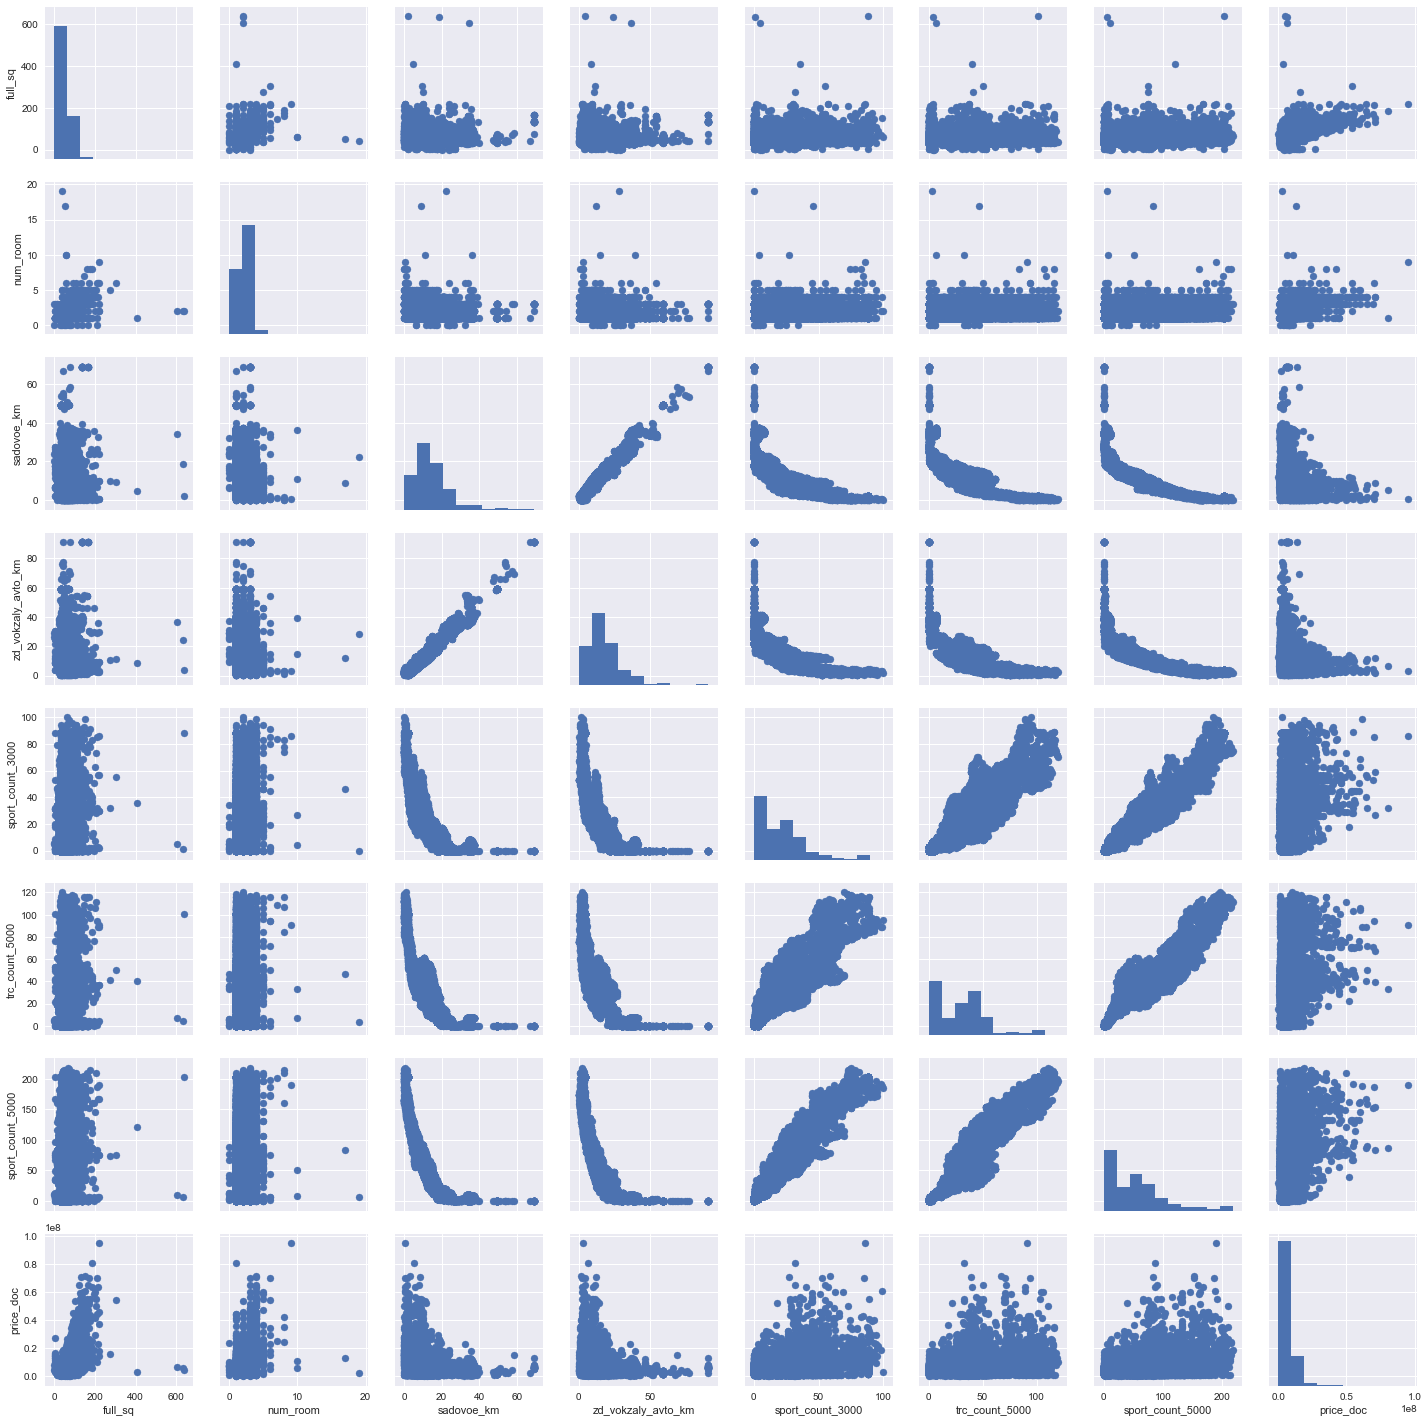

In [109]:
g = sns.PairGrid(df_no_na)
# g = g.map(plt.scatter)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)


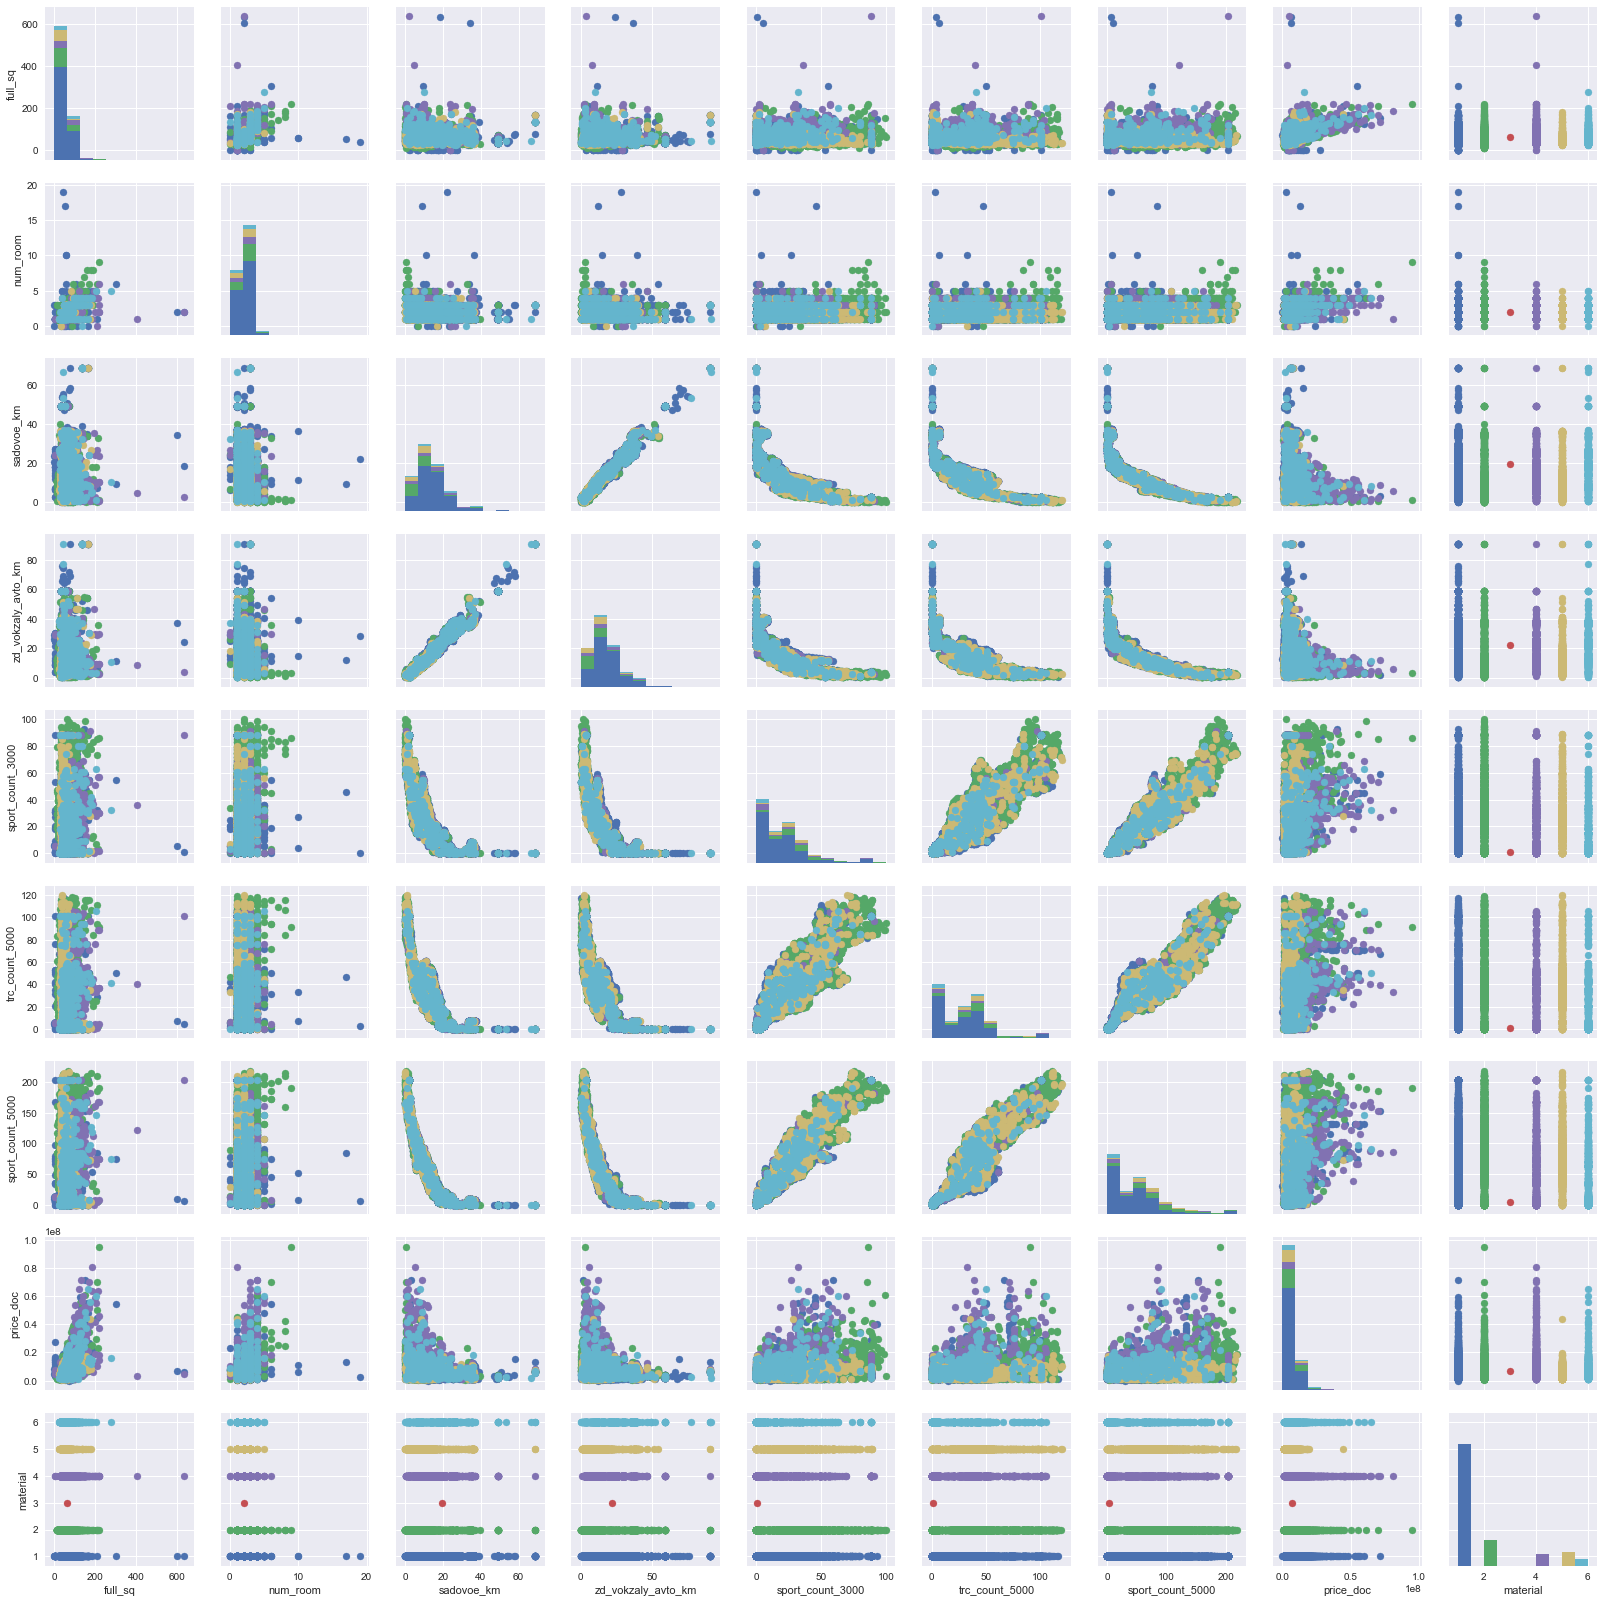

In [124]:
g = sns.PairGrid(df_no_na,hue='material')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)


In [18]:

# train_df.plot(x='nuclear_reactor_km',y='price_doc',kind='scatter')

# np.sort()
y = np.sort(train_df['price_doc'].values)
x = range(0,train_df.shape[0])
print y[:5]
print x[:5]

[100000 190000 200000 260000 300000]
[0, 1, 2, 3, 4]


There are quite a few variables in this dataset. 

Let us start with target variable exploration - 'price_doc'. First let us do a scatter plot to see if there are any outliers in the data.

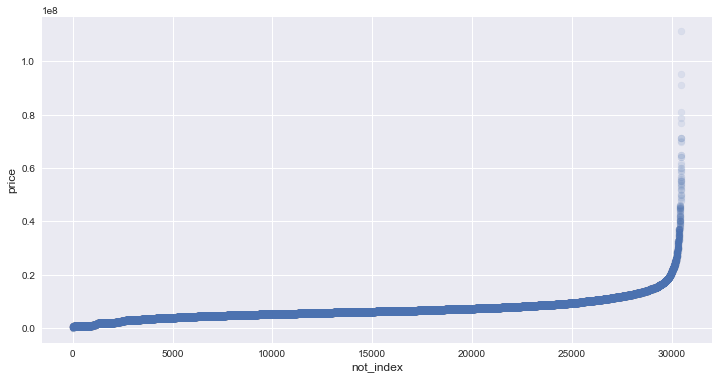

In [26]:
plt.figure(figsize=(12,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.price_doc.values),alpha=0.1)
plt.xlabel('not_index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()



Looks okay to me. Also since the metric is RMSLE, I think it is okay to have it as such. However if needed, one can truncate the high values. 

We can now bin the 'price_doc' and plot it.

In [56]:
# plt.figure(figsize=(12,8))
# sns.distplot(.values, bins=1000, kde=True)
# plt.xlabel('price', fontsize=12)

# plt.show()
train_df[train_df['price_doc'] < 1.1*10**6]['price_doc'].value_counts() / len(train_df[train_df['price_doc'] < 1.1*10**6])

1000000    0.743284
990000     0.153234
999000     0.023881
1050000    0.014925
500000     0.008955
995000     0.004975
1020000    0.002985
998000     0.002985
1030000    0.002985
900000     0.002985
779396     0.001990
950000     0.001990
200000     0.000995
552312     0.000995
976000     0.000995
675205     0.000995
705805     0.000995
354289     0.000995
1015000    0.000995
472249     0.000995
1007000    0.000995
550000     0.000995
919584     0.000995
301693     0.000995
340000     0.000995
360000     0.000995
720000     0.000995
917000     0.000995
395685     0.000995
338570     0.000995
260000     0.000995
989000     0.000995
551750     0.000995
550637     0.000995
476902     0.000995
331464     0.000995
100000     0.000995
897661     0.000995
1085877    0.000995
700000     0.000995
410000     0.000995
999990     0.000995
190000     0.000995
300000     0.000995
999900     0.000995
1005000    0.000995
827400     0.000995
Name: price_doc, dtype: float64

Certainly a very long right tail. Since our metric is Root Mean Square **Logarithmic** error, let us plot the log of price_doc variable.

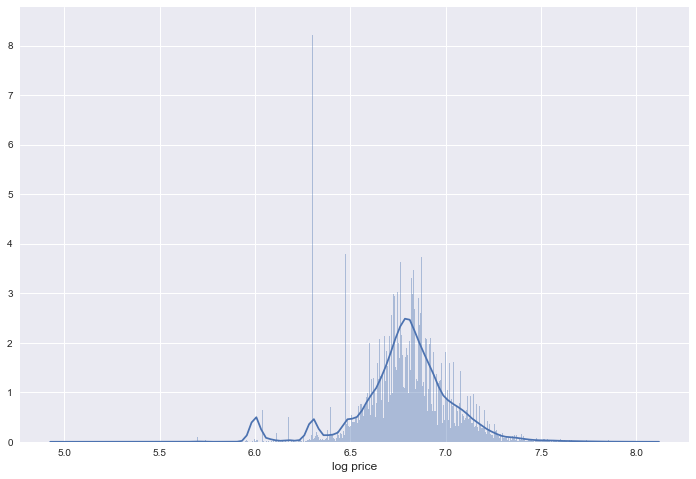

In [49]:
plt.figure(figsize=(12,8))
sns.distplot(np.log10(train_df.price_doc.values), bins=1000, kde=True)
plt.xlabel('log price', fontsize=12)
plt.show()

In [83]:
import datetime
pd.to_datetime(train_df['timestamp'])
train_df['timestamp'].astype(datetime.datetime)
train_df['yearmonth'] = train_df['timestamp'].apply(lambda x: x[:4]+x[5:7])

This looks much better than the previous one. 

Now let us see how the median housing price change with time. 

In [95]:

train_df['yearmonth'].str[:-2].value_counts() / train_df.shape[0]
                                                   


2014    0.448361
2013    0.261823
2012    0.158807
2015    0.106298
2011    0.024712
Name: yearmonth, dtype: float64

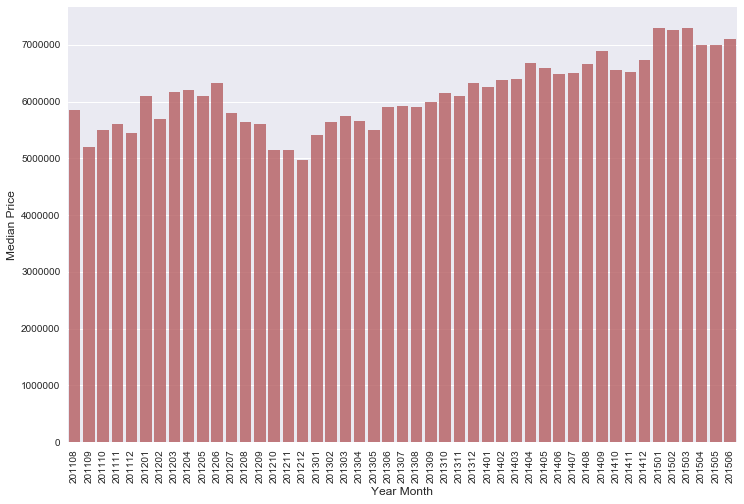

In [80]:
plt.figure(figsize=(12,8))
sns.barplot(grouped_df.yearmonth.values, grouped_df.price_doc.values, alpha=0.8, color=color[2])
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('Year Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

There are some variations in the median price with respect to time. Towards the end, there seems to be some linear increase in the price values.

Now let us dive into other variables and see. Let us first start with getting the count of different data types. 

In [9]:
train_df = pd.read_csv("../input/train.csv", parse_dates=['timestamp'])
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,157
1,datetime64[ns],1
2,float64,119
3,object,15


So majority of them are numerical variables with 15 factor variables and 1 date variable.

Let us explore the number of missing values in each column.

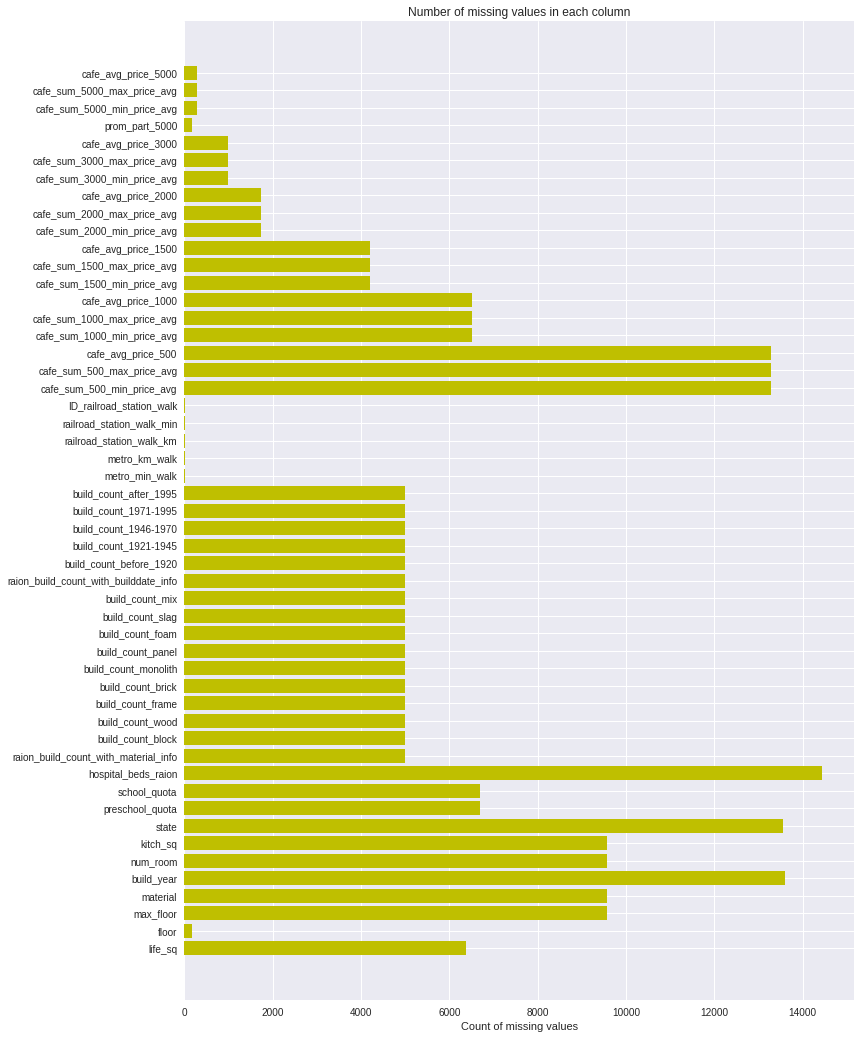

In [10]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='y')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

Seems variables are found to missing as groups.

Since there are 292 variables, let us build a basic xgboost model and then explore only the important variables.

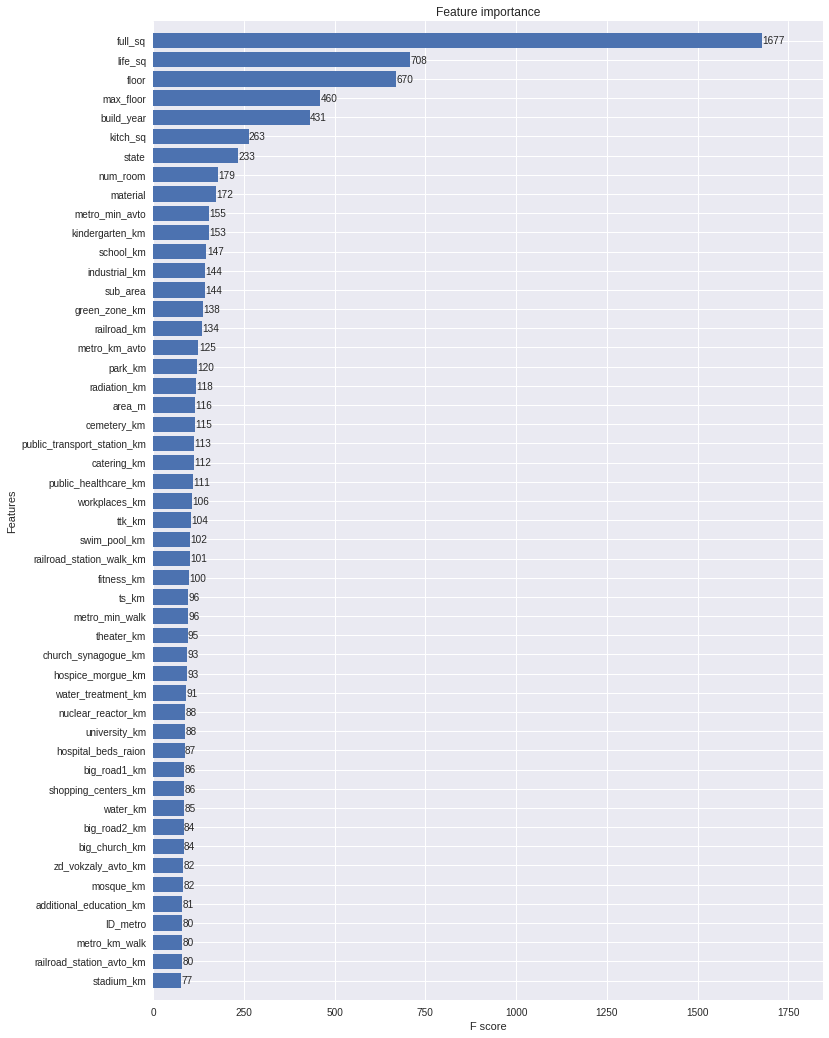

In [11]:
for f in train_df.columns:
    if train_df[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_df[f].values)) 
        train_df[f] = lbl.transform(list(train_df[f].values))
        
train_y = train_df.price_doc.values
train_X = train_df.drop(["id", "timestamp", "price_doc"], axis=1)

xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()


So the top 5 variables and their description from the data dictionary are:

 1. full_sq - total area in square meters, including loggias, balconies and other non-residential areas
 2. life_sq - living area in square meters, excluding loggias, balconies and other non-residential areas
 3. floor - for apartments, floor of the building
 4. max_floor - number of floors in the building
 5. build_year - year built

Now let us see how these important variables are distributed with respect to target variable.

**Total area in square meters:**

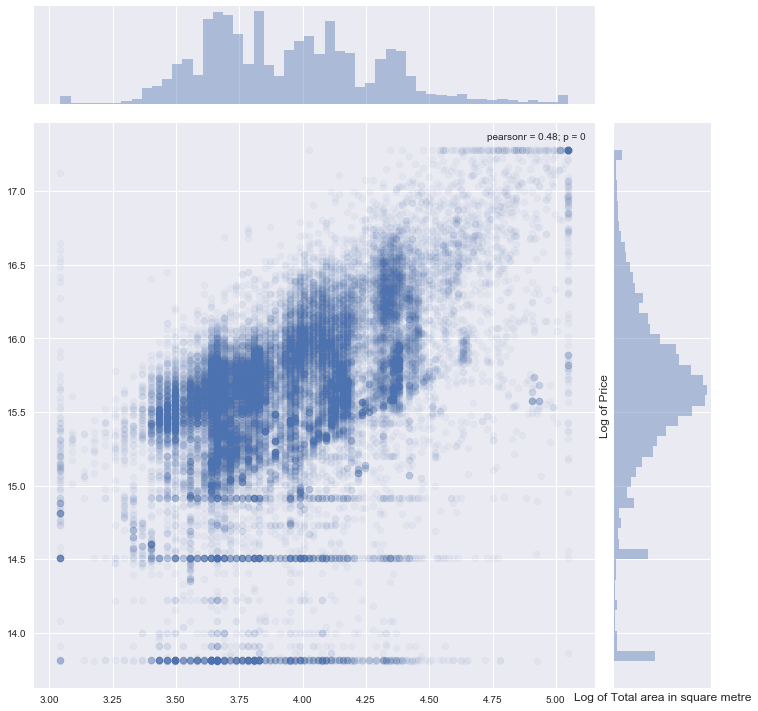

In [99]:
ulimit = np.percentile(train_df.price_doc.values, 99.5)
llimit = np.percentile(train_df.price_doc.values, 0.5)
train_df['price_doc'].ix[train_df['price_doc']>ulimit] = ulimit
train_df['price_doc'].ix[train_df['price_doc']<llimit] = llimit

col = "full_sq"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col].ix[train_df[col]>ulimit] = ulimit
train_df[col].ix[train_df[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=np.log1p(train_df.full_sq.values), y=np.log1p(train_df.price_doc.values),alpha=0.05, size=10)
plt.ylabel('Log of Price', fontsize=12)
plt.xlabel('Log of Total area in square metre', fontsize=12)
plt.show()

**Living area in square meters:**

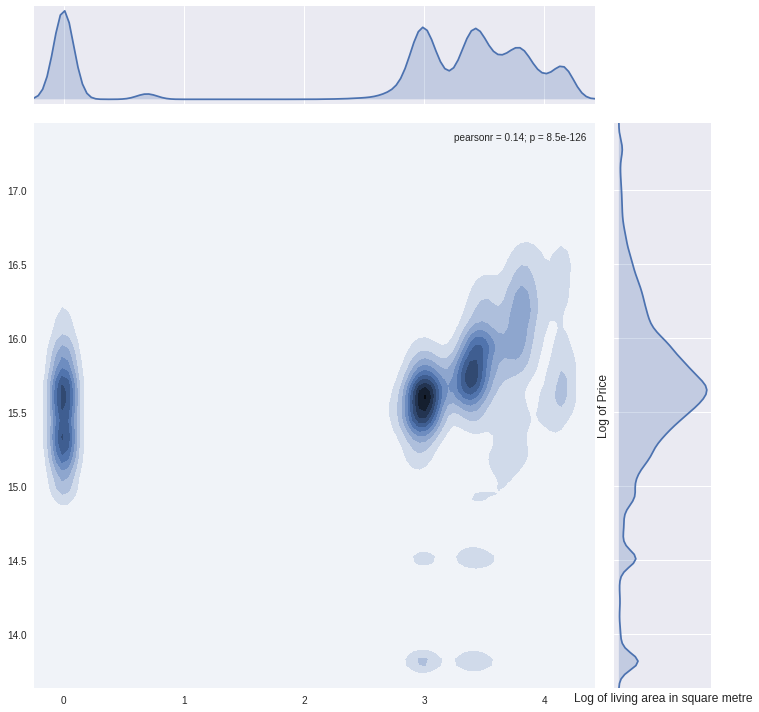

In [13]:
col = "life_sq"
train_df[col].fillna(0, inplace=True)
ulimit = np.percentile(train_df[col].values, 95)
llimit = np.percentile(train_df[col].values, 5)
train_df[col].ix[train_df[col]>ulimit] = ulimit
train_df[col].ix[train_df[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=np.log1p(train_df.life_sq.values), y=np.log1p(train_df.price_doc.values), 
              kind='kde', size=10)
plt.ylabel('Log of Price', fontsize=12)
plt.xlabel('Log of living area in square metre', fontsize=12)
plt.show()

**Floor:**

We will see the count plot of floor variable.

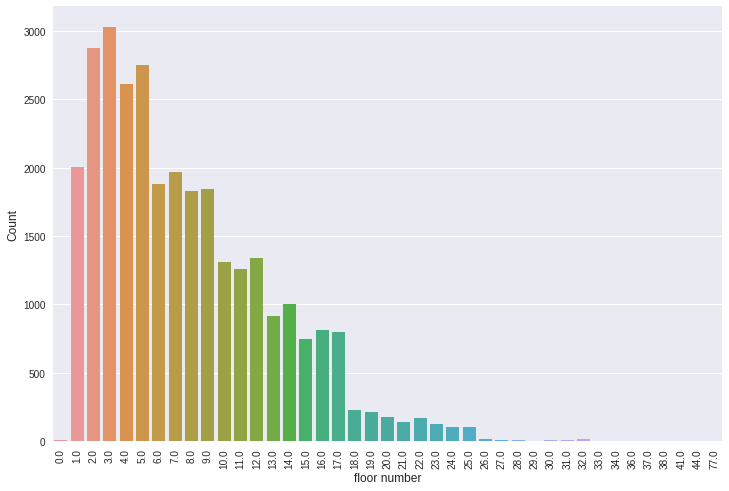

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(x="floor", data=train_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('floor number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

The distribution is right skewed. There are some good drops in between (5 to 6, 9 to 10, 12 to 13, 17 to 18). Now let us see how the price changes with respect to floors.

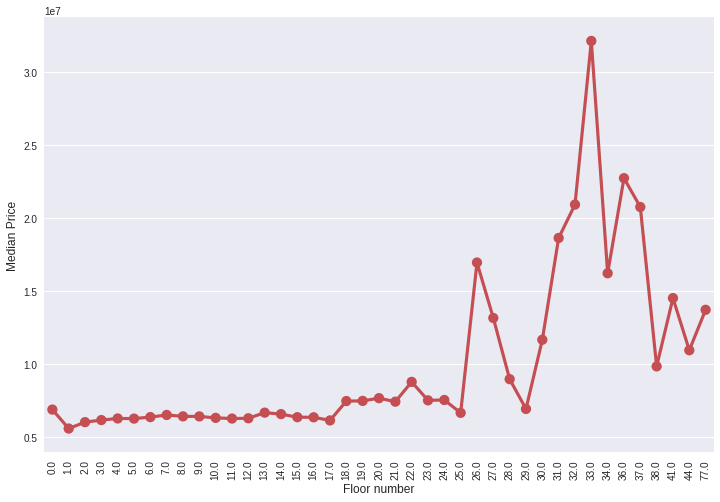

In [15]:
grouped_df = train_df.groupby('floor')['price_doc'].aggregate(np.median).reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(grouped_df.floor.values, grouped_df.price_doc.values, alpha=0.8, color=color[2])
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('Floor number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

This shows an overall increasing trend (individual houses seems to be costlier as well - check price of 0 floor houses). 
A sudden increase in the house price is also observed at floor 18.

**Max floor:**

Total number of floors in the building is one another important variable. So let us plot that one and see.

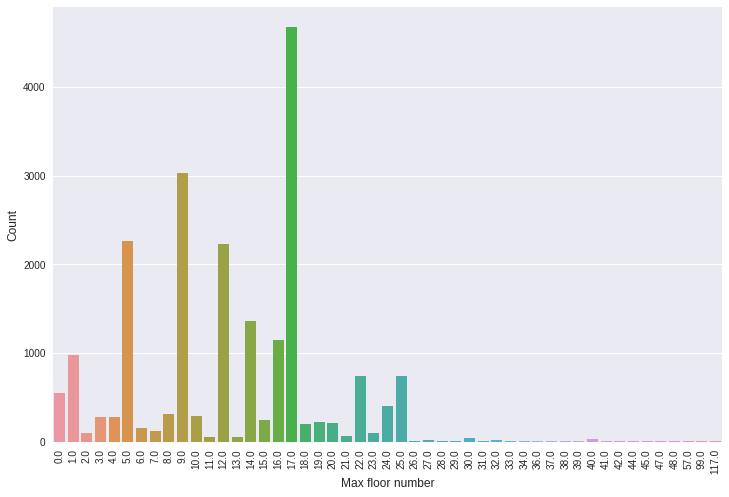

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(x="max_floor", data=train_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Max floor number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

We could see that there are few tall bars in between (at 5,9,12,17 - similar to drop in floors in the previous graph). May be there are some norms / restrictions on the number of maximum floors present(?). 

Now let us see how the median prices vary with the max floors. 

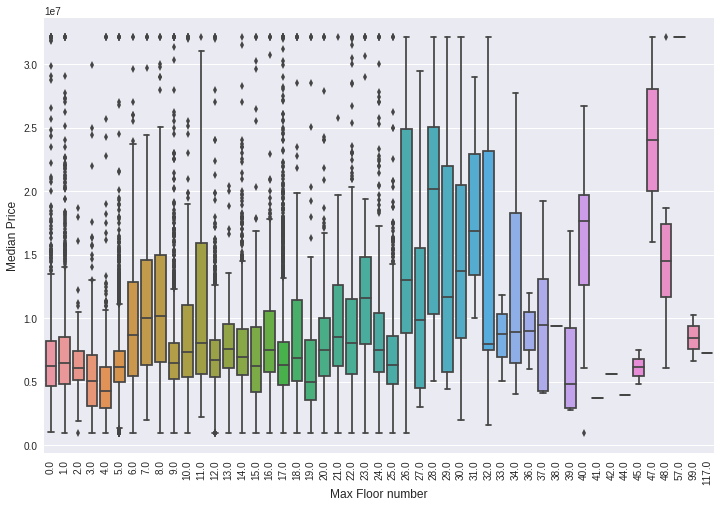

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(x="max_floor", y="price_doc", data=train_df)
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('Max Floor number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

More to come. Stay tuned.!